In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("Project1.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   int64  
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

<ipython-input-4-a9aaf188679a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


<Axes: >

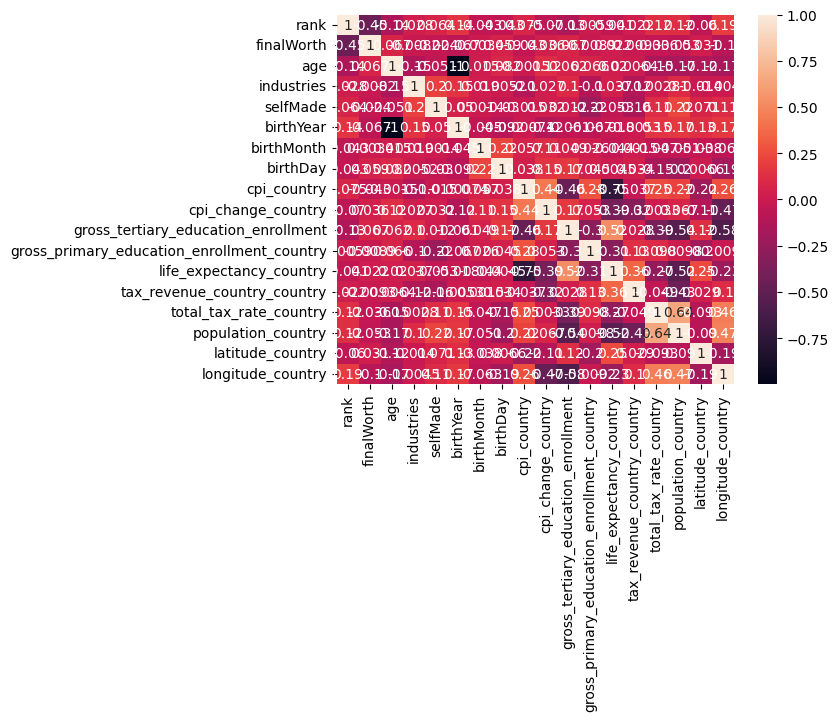

In [4]:
correlation = data.corr()
plt.figure()
sns.heatmap(correlation, annot = True)

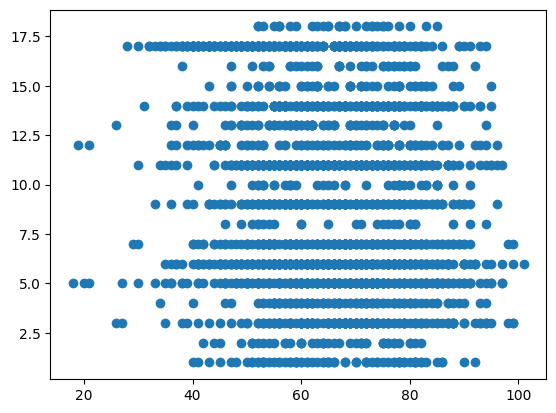

In [5]:
plt.scatter(x = data['age'], y= data['industries'])
plt.show()

In [6]:
data_linear = data.drop(columns=['rank', 'finalWorth', 'personName', 'country', 'city', 'source', 'organization', 'status', 'gender', 'birthDate', 'lastName', 'firstName', 'title', 'date', 'state', 'residenceStateRegion', 'birthYear', 'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country', 'gdp_country', 'gross_tertiary_education_enrollment', 'gross_primary_education_enrollment_country', 'life_expectancy_country', 'tax_revenue_country_country', 'total_tax_rate_country', 'population_country', 'latitude_country', 'longitude_country'])
data_linear['selfMade'] = data_linear['selfMade'].astype(int)
data_linear

,category,age,industries,countryOfCitizenship,selfMade
0,Fashion & Retail,74.0,5,France,0
1,Automotive,51.0,1,United States,1
2,Technology,59.0,17,United States,1
3,Technology,78.0,17,United States,1
4,Finance & Investments,92.0,6,United States,1
...,...,...,...,...,...
2635,Healthcare,51.0,9,China,1
2636,Food & Beverage,80.0,7,United States,0
2637,Manufacturing,60.0,11,China,1
2638,Real Estate,71.0,14,China,1


In [7]:
x = data_linear[['industries']]
y = data_linear[['selfMade']]

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [9]:
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

LinearRegression()

In [10]:
c = linear_regression.intercept_
c

array([0.50903243])

In [11]:
m = linear_regression.coef_
m

array([[0.01911546]])

In [12]:
y_train_pred = linear_regression.predict(x_train)
y_test_pred = linear_regression.predict(x_test)

Text(0.5, 0, 'industries')

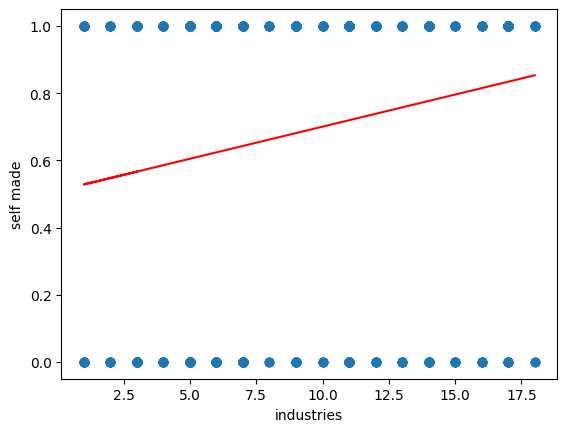

In [13]:
plt.scatter(x_train,y_train)
plt.plot(x_train,y_train_pred,color = 'red')
plt.ylabel("self made")
plt.xlabel("industries")

In [51]:
r2_linear = r2_score(y_test_pred, y_test)
r2_linear

-24.642796440889022

In [52]:
mse_linear = mean_squared_error(y_test_pred, y_test)
mse_linear

0.20721439882997644

In [29]:
data_linear['age'].fillna(0, inplace = True)
data_linear['age'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
2635    False
2636    False
2637    False
2638    False
2639    False
Name: age, Length: 2640, dtype: bool

In [30]:
x1 = data_linear[['industries']]
y1 = data_linear[['age', 'selfMade']]


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(x1,y1,test_size=0.3)

In [35]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, Y_train)

KNeighborsRegressor()

In [39]:
y1_pred = knn.predict(X_test)

In [48]:
rscore = r2_score(y1_pred,Y_test)
rscore

-5.325704291466391

In [49]:
mse = mean_squared_error(y1_pred, Y_test)
mse

150.70320707070704